AND ゲート

$$
{\rm AND}(x_1, x_2) = \begin{cases}
1 & (x_1 = 1\, かつ\, x_2 = 1) \\
0 & (それ以外)
\end{cases}
$$

|x1|x2|y|
|--:|--:|-:|
|0|0|0|
|1|0|0|
|0|1|0|
|1|1|1|



NAND ゲート

$$
{\rm NAND}(x_1, x_2) = \begin{cases}
0 & (x_1 = 1\, かつ\, x_2 = 1) \\
1 & (それ以外)
\end{cases}
$$

|x1|x2|y|
|--:|--:|-:|
|0|0|1|
|1|0|1|
|0|1|1|
|1|1|0|



OR ゲート

$$
{\rm OR}(x_1, x_2) = \begin{cases}
1 & (x_1 = 1\, または\, x_2 = 1) \\
0 & (それ以外)
\end{cases}
$$

|x1|x2|y|
|--:|--:|-:|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|1|



In [1]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [2]:
AND(0, 0)

0

In [3]:
AND(1, 0)

0

In [4]:
AND(0, 1)

0

In [5]:
AND(1, 1)

1

In [6]:
import numpy as np

In [7]:
x = np.array([0, 1]) # 入力

In [8]:
w = np.array([0.5, 0.5]) # 重み

In [9]:
b = -0.7 # バイアス

In [10]:
w * x

array([ 0. ,  0.5])

In [11]:
np.sum(w*x)

0.5

In [12]:
np.sum(w*x) + b

-0.19999999999999996

In [13]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [14]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [15]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [16]:
for x2 in (0, 1):
    for x1 in (0, 1):
        print(x1, x2, AND(x1, x2))

0 0 0
1 0 0
0 1 0
1 1 1


In [17]:
for x2 in (0, 1):
    for x1 in (0, 1):
        print(x1, x2, NAND(x1, x2))

0 0 1
1 0 1
0 1 1
1 1 0


In [18]:
for x2 in (0, 1):
    for x1 in (0, 1):
        print(x1, x2, OR(x1, x2))

0 0 0
1 0 1
0 1 1
1 1 1


XOR ゲート

$$
{\rm XOR}(x_1, x_2) = \begin{cases}
1 & (x_1, x_2 いずれか一方のみ = 1) \\
0 & (それ以外)
\end{cases}
$$

|x1|x2|y|
|--:|--:|-:|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|0|



In [19]:
w = np.array([1.0, 1.0])
b = -0.5

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

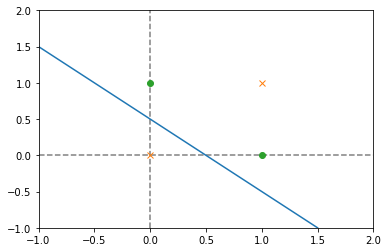

In [21]:
f = lambda x: x*-w[0]/w[1]-b
x = np.arange(-1, 2, 0.5)
plt.hlines([0], -1, 2, colors="grey", linestyles="dashed")
plt.vlines([0], -1, 2, colors="grey", linestyles="dashed")
plt.plot(x, f(x))
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.plot([0, 1], [0, 1], "x")
plt.plot([0, 1], [1, 0], "o")

In [22]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [23]:
for x2 in (0, 1):
    for x1 in (0, 1):
        print(x1, x2, XOR(x1, x2))

0 0 0
1 0 1
0 1 1
1 1 0


In [26]:
def XOR2(x1, x2):
    W = np.array([[-0.5, -0.5], [0.5, 0.5]])
    B = np.array([0.7, -0.2])
    X = np.array([x1, x2])
    a = W.dot(X) + B
    Y = (a > 0).astype("float")
    return AND(*Y)

In [27]:
for x2 in (0, 1):
    for x1 in (0, 1):
        print(x1, x2, XOR2(x1, x2))

0 0 0
1 0 1
0 1 1
1 1 0
